<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Explorando_dados_do_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="20%" src="https://github.com/leonarddocchagas/data_science/blob/master/projetos/_imagens/Titanic.png?raw=true" align="center">

## Análise dos Dados do Titanic

#### **Um pouco de história**

Em 2 de Abril de 1912 fica pronto o navio "Que nem Deus pode afundar!". Frase que ficou marcada na produção cinamatográfica de James Cameron. 

A história do Titanic realmente é incrível em todos os aspectos. Em seu tempo, era considerado a maior embarcação já criada e os números comprovam. Tinha 269 metros de comprimento, 28 metros de largura e 53 metros de altura. Operava com uma tripulação de 892 pessoas e podia transportar até 2435 passageiros.


## Obtenção dos Dados

In [1]:
# importar bibiotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# redenrizar mapas
!pip install folium
import folium
from folium import plugins

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importa dados
df = pd.read_csv('https://bit.ly/2A6J2fm')

In [3]:
# exibi as 5 primeiras linhas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Dicionário de Dados**
* `PassengerId:` Número de identificação do passageiro
* `Survived:` Informa se o passageiro sobreviveu ao desastre
* 0 = Não
* 1 = Sim
* `Pclass:` Classe do bilhete
* 1 = 1ª Classe
* 2 = 2ª Classe
* 3 = 3ª Classe
* `Name:` Nome do passageiro
* `Sex:` Sexo do passageiro
* `Age:` Idade do passageiro
* `SibSp:` Quantidade de cônjuges e irmãos a bordo
* `Parch:` Quantidade de pais e filhos a bordo
* `Ticket:` Número da passagem
* `Fare:` Preço da Passagem
* `Cabin:` Número da cabine do passageiro
* `Embarked:` Porto no qual o passageiro embarcou
* C = Cherbourg
* Q = Queenstown
* S = Southampton

###**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
df.shape

(891, 12)

In [5]:
# atributos e entradas
print('Atributos: {}' .format(df.shape[1]))
print('Entradas: {}\n ' .format(df.shape[0]))

display(df.dtypes)

Atributos: 12
Entradas: 891
 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###**Valores ausentes**

In [6]:
# quantidade
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# percentual 
df.isnull().sum() / df.shape[1]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            14.750000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          57.250000
Embarked        0.166667
dtype: float64

#### **Tratando NaN (valores ausentes)**
É sempre importante atentar para valores (missing | faltantes | NaN) em nosso dataset. Em diversas análises, ausencia de informação causa falha. Em nosso caso, vamos apresentar a informação da localiação dos Embarques em forma de mapa e detectamos 2 valores ausentes na variável Embarked. Por se tratar de poucos registros, vamos eliminar essas duas entradas.  

In [0]:
# excluindo NaN da variável Embarked
df.dropna(subset=['Embarked'], inplace=True)

In [25]:
# exibido dataset depois do tratamento
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Latitude         0
Longitude        0
dtype: int64

### **Distribuição das variáveis**

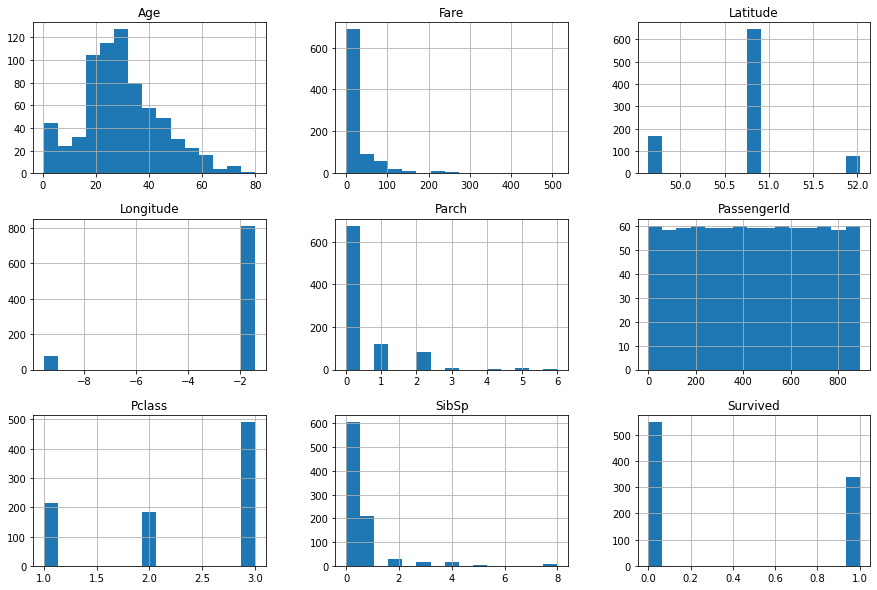

In [26]:
# densidade das variáveis
df.hist(bins=15, figsize=(15, 10));

### **Onde aconteceram os embarques?**

#### Informações apresentadas em mapas sempre é interessante. Então com o objetivo de enrequecer a análise, vamos adiciona ao conjunto de dados as coordenadas de latitude e longitude, que foi extraida manualmente do Google. Extração manual não é a melhor forma,  mas como são apenas 3 portos, valeu o esforço. 

#### **Coordenadas:**
* Queenstown: 52.0267662,-9.5458724
* Southampton: 50.9052739,-1.4148693
* Cheargourg: 49.6374801,-1.6192302

In [0]:
# função latitude
def func_latitude(a):
  if a == 'C':
    return 49.6374801
  if a == 'S':
    return 50.9052739
  if a == 'Q':
    return 52.0267662


In [0]:
# função longitude
def func_longitude(a):
  if a == 'C':
    return -1.6192302
  if a == 'S':
    return -1.4148693
  if a == 'Q':
    return -9.5458724

In [0]:
# adiciona latitude e longitude ao dataset com a função map
df['Latitude'] = list(map(func_latitude, df['Embarked']))
df['Longitude'] = list(map(func_longitude, df['Embarked']))

In [30]:
# exibi dataset com as novas colunas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Latitude,Longitude
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,50.905274,-1.414869
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,49.637480,-1.619230
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,50.905274,-1.414869
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50.905274,-1.414869
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,50.905274,-1.414869


In [0]:
coordenadas=[]
for lat,lng in zip(df.Latitude, df.Longitude):
  coordenadas.append([lat,lng])

In [0]:
mapa = folium.Map(location=[52.874871,-6.7663974], zoom_start=6, tiles='Stamen Toner')

In [40]:
mapa.add_child(plugins.HeatMap(coordenadas))